### **1. Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Import the dataset**

In [2]:
from google.colab import files
file = files.upload()

Saving Pokemon Data.csv to Pokemon Data.csv


In [3]:
data = pd.read_csv('Pokemon Data.csv')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### **3. Data Exploration and Handling Null Values**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### **We can see that not all pokemon have dual types e.g. Charmander, so lets replace any NaN values in Type 2 column**

In [6]:
data['Type 2'].fillna(value='None',inplace=True)
data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### **4. Exploratory Data Analysis**

Nice! lets start doing some visualisation to understand our data

1. How much of each primary type are there?

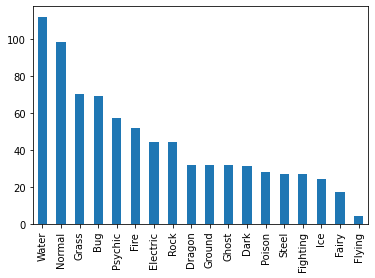

In [7]:
data['Type 1'].value_counts().plot.bar()

Woaahhh so many water types!! we can see that there are not many primary flying types, hmm why dont we look at the type 2 count too!

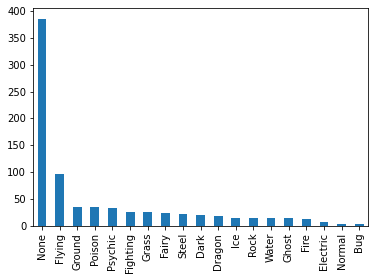

In [8]:
data['Type 2'].value_counts().plot.bar()

So we can see that having a second type is actually quite rare among all the 800 pokemon with almost 50% having no type at all.

In pokemon the Legendary pokemon, were always the coolest. Lets see how many there are?

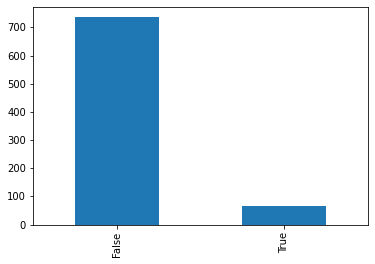

In [9]:
data['Legendary'].value_counts().plot.bar()

Damn! The legendary Pokémon live up to their name of rarity with less than a 1/8 of Pokemon holding that status.

I wonder if any of the other features in the dataset can indicate whether a pokemon is legendary or not!

### **5. Data Preprocessing**

#### **5.1 Handling Categorical Features**

In [10]:
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [11]:
data['Type 2'].unique()

array(['Poison', 'None', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Legendary'] = lb.fit_transform(data['Legendary'])

In [13]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,39,52,43,60,50,65,1,0


In [14]:
data.drop('Name', axis=1, inplace=True)

In [15]:
data = pd.get_dummies(data)

In [16]:
data.shape

(800, 46)

### **6. Split data into training and testing**

In [17]:
from sklearn.model_selection import train_test_split

y = data.pop('Legendary')
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **7. Model Building**

In [18]:
# Initialize the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# Check model efficiency
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.96875

### **Conclusion -**
We can see here that the Random Forest gives accuracy equal to 96.875%